Loading the dataset and defining the model

In [7]:
#import necessary libraries
import numpy as np
from tensorflow import keras


In [8]:

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


In [9]:
# Normalize the input images
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

In [10]:
# Flatten the images
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)


In [11]:
# Convert labels to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [12]:
# Define the model
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=(28 * 28,)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


In [14]:
# Define the learning rate range for exploration
min_lr = 1e-5
max_lr = 1e-1


Defining the learning rate and training the model

In [15]:
# Define a callback to track learning rate and losses
class LearningRateTracker(keras.callbacks.Callback):
    def __init__(self):
        super(LearningRateTracker, self).__init__()
        self.lrates = []
        self.losses = []

    def on_batch_end(self, batch, logs=None):
        optimizer = self.model.optimizer
        lr = keras.backend.get_value(optimizer.lr)
        self.lrates.append(lr)
        self.losses.append(logs["loss"])


In [22]:
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the learning rate tracker callback
lr_tracker = LearningRateTracker()

# Train the model
model.fit(X_train, y_train, epochs=18, batch_size=128, callbacks=[lr_tracker])


Epoch 1/18
469/469 [==============================] - 2s 4ms/step - loss: 0.0129 - accuracy: 0.9956
Epoch 2/18
469/469 [==============================] - 2s 4ms/step - loss: 0.0063 - accuracy: 0.9979
Epoch 3/18
469/469 [==============================] - 2s 4ms/step - loss: 0.0077 - accuracy: 0.9976
Epoch 4/18
469/469 [==============================] - 2s 4ms/step - loss: 0.0102 - accuracy: 0.9966
Epoch 5/18
469/469 [==============================] - 2s 4ms/step - loss: 0.0074 - accuracy: 0.9976
Epoch 6/18
469/469 [==============================] - 2s 4ms/step - loss: 0.0084 - accuracy: 0.9973
Epoch 7/18
469/469 [==============================] - 2s 4ms/step - loss: 0.0052 - accuracy: 0.9984
Epoch 8/18
469/469 [==============================] - 2s 4ms/step - loss: 0.0064 - accuracy: 0.9979
Epoch 9/18
469/469 [==============================] - 2s 4ms/step - loss: 0.0057 - accuracy: 0.9980
Epoch 10/18
469/469 [==============================] - 2s 4ms/step - loss: 0.0081 - accuracy: 0.9974

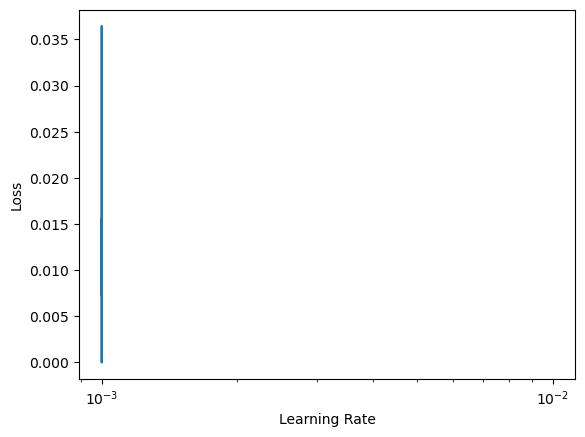

In [23]:
# Plot the learning rate versus loss
plt.plot(lr_tracker.lrates, lr_tracker.losses)
plt.gca().set_xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()


In [24]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 [==============================] - 0s 1ms/step - loss: 0.1081 - accuracy: 0.9808
Test Loss: 0.1081230491399765
Test Accuracy: 0.9807999730110168
